In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.pipeline import make_pipeline


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
true = pd.read_csv('ta_true.csv')
false = pd.read_csv("ta_fake.csv")

In [ ]:
true.head()

,text,label
0,"நாங்கள் எவர் மீதும் வெறுப்பை காட்டவில்லை, யாரை...",1
1,நபார்டு வங்கி மற்றும் ஆசிய-பசிபிக் கிராமப்புற ...,1
2,விவசாயத்தை வியாபாரமாக நடத்த வேண்டும்: மைக்ரோசா...,1
3,எனவே வேலைக்கேற்ற ஆட்களைப் பார்த்துப் பார்த்துப...,1
4,கடந்த 20-ம் தேதி அமெரிக்க அதிப ராக பொறுப்பேற்ற...,1


In [ ]:
false.head()

,text,label
0,ஆலங்கட்டி மழை பெய்தது திருத்தணியா… கொடைக்கானலா...,0
1,தூத்துக்குடியில் போலீசார் துப்பாக்கியால் சுடும...,0
2,பெண்கள் கால் மேல் கால் போட்டு அமர்ந்தால் கர்ப்...,0
3,பெரிய வீட்டுப் பிள்ளைகள் தப்பு செய்வது சகஜம் எ...,0
4,குடியுரிமை திருத்தச் சட்டத்தை எதிர்ப்பவர்களை ந...,0


In [ ]:


data = pd.concat([true, false])

# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)


In [ ]:
stop_words='''ஒரு
என்று
மற்றும்
இந்த
இது
என்ற
கொண்டு
என்பது
பல
ஆகும்
அல்லது
அவர்
நான்
உள்ள
அந்த
இவர்
என
முதல்
என்ன
இருந்து
சில
என்
போன்ற
வேண்டும்
வந்து
இதன்
அது
அவன்
தான்
பலரும்
என்னும்
மேலும்
பின்னர்
கொண்ட
இருக்கும்
தனது
உள்ளது
போது
என்றும்
அதன்
தன்
பிறகு
அவர்கள்
வரை
அவள்
நீ
ஆகிய
இருந்தது
உள்ளன
வந்த
இருந்த
மிகவும்
இங்கு
மீது
ஓர்
இவை
இந்தக்
பற்றி
வரும்
வேறு
இரு
இதில்
போல்
இப்போது
அவரது
மட்டும்
இந்தப்
எனும்
மேல்
பின்
சேர்ந்த
ஆகியோர்
எனக்கு
இன்னும்
அந்தப்
அன்று
ஒரே
மிக
அங்கு
பல்வேறு
விட்டு
பெரும்
அதை
பற்றிய
உன்
அதிக
அந்தக்
பேர்
இதனால்
அவை
அதே
ஏன்
முறை
யார்
என்பதை
எல்லாம்
மட்டுமே
இங்கே
அங்கே
இடம்
இடத்தில்
அதில்
நாம்
அதற்கு
எனவே
பிற
சிறு
மற்ற
விட
எந்த
எனவும்
எனப்படும்
எனினும்
அடுத்த
இதனை
இதை
கொள்ள
இந்தத்
இதற்கு
அதனால்
தவிர
போல
வரையில்
சற்று
எனக்'''

In [ ]:
stopwords= stop_words.split()

# Add a comma after every word
stopwords_tamil =', '.join(stopwords)
stopwords_tamil = stopwords_tamil.split(', ')

In [ ]:
print(stopwords_tamil)

ஒரு, என்று, மற்றும், இந்த, இது, என்ற, கொண்டு, என்பது, பல, ஆகும், அல்லது, அவர், நான், உள்ள, அந்த, இவர், என, முதல், என்ன, இருந்து, சில, என், போன்ற, வேண்டும், வந்து, இதன், அது, அவன், தான், பலரும், என்னும், மேலும், பின்னர், கொண்ட, இருக்கும், தனது, உள்ளது, போது, என்றும், அதன், தன், பிறகு, அவர்கள், வரை, அவள், நீ, ஆகிய, இருந்தது, உள்ளன, வந்த, இருந்த, மிகவும், இங்கு, மீது, ஓர், இவை, இந்தக், பற்றி, வரும், வேறு, இரு, இதில், போல், இப்போது, அவரது, மட்டும், இந்தப், எனும், மேல், பின், சேர்ந்த, ஆகியோர், எனக்கு, இன்னும், அந்தப், அன்று, ஒரே, மிக, அங்கு, பல்வேறு, விட்டு, பெரும், அதை, பற்றிய, உன், அதிக, அந்தக், பேர், இதனால், அவை, அதே, ஏன், முறை, யார், என்பதை, எல்லாம், மட்டுமே, இங்கே, அங்கே, இடம், இடத்தில், அதில், நாம், அதற்கு, எனவே, பிற, சிறு, மற்ற, விட, எந்த, எனவும், எனப்படும், எனினும், அடுத்த, இதனை, இதை, கொள்ள, இந்தத், இதற்கு, அதனால், தவிர, போல, வரையில், சற்று, எனக்


In [ ]:
print(type(stopwords_tamil))

<class 'str'>


In [ ]:
stopwords_tamil = stopwords_tamil.split(', ')

In [ ]:
stopwords_tamil

In [ ]:
# Create a pipeline with TF-IDF vectorizer and Multinomial Naive Bayes classifier
model = make_pipeline(TfidfVectorizer(stop_words=stopwords_tamil), MultinomialNB())

# Train the model
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['அங', 'அட', 'அத', 'அதன', 'அதற', 'அந', 'அன', 'அல', 'அவ', 'அவன', 'அவர', 'அவரத', 'அவள', 'ஆக', 'இங', 'இடத', 'இடம', 'இத', 'இதன', 'இதற', 'இந', 'இன', 'இப', 'இர', 'இவ', 'இவர', 'உன', 'உள', 'எந', 'எனக', 'எனப', 'எனவ', 'எல', 'ஏன', 'ஒர', 'ஓர', 'கள', 'கவ', 'சற', 'தக', 'தத', 'தன', 'தனத', 'தப', 'தல', 'தவ', 'னர', 'பட', 'பத', 'பற', 'பலர', 'மட', 'மற', 'றக', 'லத', 'ளத', 'ளன', 'வந', 'வர'] not in stop_words.
  warnings.warn(


Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words=['ஒரு', 'என்று', 'மற்றும்', 'இந்த',
                                             'இது', 'என்ற', 'கொண்டு', 'என்பது',
                                             'பல', 'ஆகும்', 'அல்லது', 'அவர்',
                                             'நான்', 'உள்ள', 'அந்த', 'இவர்',
                                             'என', 'முதல்', 'என்ன', 'இருந்து',
                                             'சில', 'என்', 'போன்ற', 'வேண்டும்',
                                             'வந்து', 'இதன்', 'அது', 'அவன்',
                                             'தான்', 'பலரும்', ...])),
                ('multinomialnb', MultinomialNB())])

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Model Accuracy: 86.32%
Confusion Matrix:
[[496 118]
 [ 54 589]]


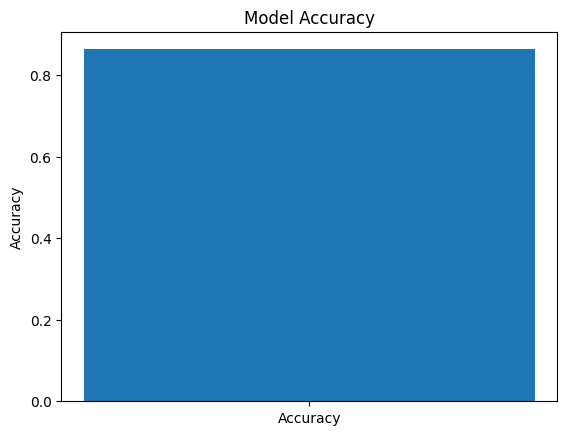

In [ ]:
# Plot the accuracy
plt.bar(['Accuracy'], [accuracy])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()
